In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from didiUtil import DIDI201705, DIDI201706, DIDI201707, DIDI201708, DIDI201709, DIDI201710
from predictor import XGBoostPredictor

Using TensorFlow backend.


## DIDI

## XgboostPredictor

In [5]:
xgb = XGBoostPredictor()

In [6]:
test_x, test_y = xgb.get_train_vec([DIDI201705])

100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


In [7]:
train_x, train_y = xgb.get_train_vec([DIDI201706])

100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


In [8]:
predictor = xgb.train_model(train_x, train_y, [(test_x, test_y)])

[0]	validation_0-rmse:0.268035
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.241524
[2]	validation_0-rmse:0.217861
[3]	validation_0-rmse:0.196601
[4]	validation_0-rmse:0.177768
[5]	validation_0-rmse:0.160895
[6]	validation_0-rmse:0.145788
[7]	validation_0-rmse:0.132353
[8]	validation_0-rmse:0.120488
[9]	validation_0-rmse:0.109942
[10]	validation_0-rmse:0.100782
[11]	validation_0-rmse:0.092628
[12]	validation_0-rmse:0.085523
[13]	validation_0-rmse:0.079331
[14]	validation_0-rmse:0.074076
[15]	validation_0-rmse:0.069509
[16]	validation_0-rmse:0.065814
[17]	validation_0-rmse:0.062543
[18]	validation_0-rmse:0.06
[19]	validation_0-rmse:0.057803
[20]	validation_0-rmse:0.05601
[21]	validation_0-rmse:0.054523
[22]	validation_0-rmse:0.053407
[23]	validation_0-rmse:0.052501
[24]	validation_0-rmse:0.051966
[25]	validation_0-rmse:0.051366
[26]	validation_0-rmse:0.050994
[27]	validation_0-rmse:0.050755
[28]	validation_0-rmse:0.050453
[29]	validation_0-rmse

In [9]:
predict_y = predictor.predict(test_x)

In [10]:
len(predict_y), len(test_y)

(744, 744)

### 使用seaborn画图需要将数据合成df

In [13]:
date_index = pd.date_range(start='2018-11-01 00:00:00', periods=len(test_y), freq='H')
merge_data = {
    'predict': predict_y.tolist(),
    'real':  test_y['res'].tolist()
}
xgb_df = pd.DataFrame(merge_data, index=date_index)

## 实验结果展示

In [14]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

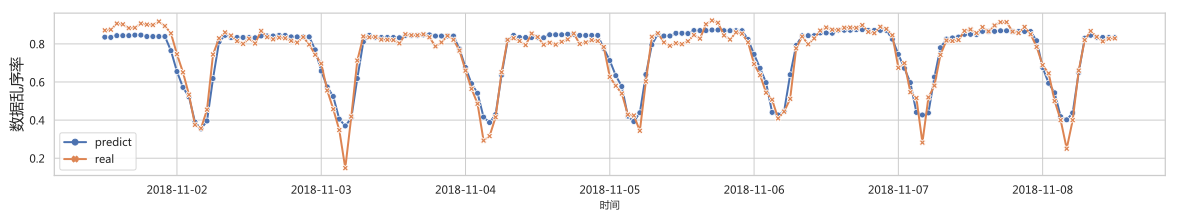

In [15]:
# plt.figure(figsize=(15, 5))
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Microsoft Yahei']
f, ax = plt.subplots(figsize = (20, 3))
# 设置图名称
# ax.set_title('DataStream DisOrder Predict - 1st Week', fontsize=15)
# 设置X轴 Y轴 的label
ax.set_xlabel('时间',fontsize=10)
ax.set_ylabel('数据乱序率',fontsize=15)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=xgb_df[12:181])
plt.savefig('滴滴预测结果-xgboost.pdf',bbox_inches='tight',format='pdf')

## 封装成一个画图类

In [14]:
from didiDraw import DrawXgboost
draw = DrawXgboost()
test_y, predict_y = draw.get_predict_result([DIDI201705], [DIDI201706])

100%|██████████| 1/1 [00:06<00:00,  6.14s/it]

[0]	validation_0-rmse:0.276789
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.251102
[2]	validation_0-rmse:0.227951
[3]	validation_0-rmse:0.207032
[4]	validation_0-rmse:0.188174
[5]	validation_0-rmse:0.171532
[6]	validation_0-rmse:0.156409
[7]	validation_0-rmse:0.142881
[8]	validation_0-rmse:0.130798
[9]	validation_0-rmse:0.120099
[10]	validation_0-rmse:0.110548
[11]	validation_0-rmse:0.101895
[12]	validation_0-rmse:0.094327
[13]	validation_0-rmse:0.087636
[14]	validation_0-rmse:0.081605
[15]	validation_0-rmse:0.076307
[16]	validation_0-rmse:0.071748
[17]	validation_0-rmse:0.067597
[18]	validation_0-rmse:0.063985
[19]	validation_0-rmse:0.060903
[20]	validation_0-rmse:0.058221
[21]	validation_0-rmse:0.05579
[22]	validation_0-rmse:0.053746
[23]	validation_0-rmse:0.052063
[24]	validation_0-rmse:0.050452
[25]	validation_0-rmse:0.049149
[26]	validation_0-rmse:0.047976
[27]	validation_0-rmse:0.046968
[28]	validation_0-rmse:0.046202
[29]	validation_0-

[59]	validation_0-rmse:0.041744
[60]	validation_0-rmse:0.041845
[61]	validation_0-rmse:0.041773
[62]	validation_0-rmse:0.041781
[63]	validation_0-rmse:0.041819
[64]	validation_0-rmse:0.041936
[65]	validation_0-rmse:0.041984
[66]	validation_0-rmse:0.041946
[67]	validation_0-rmse:0.0419
[68]	validation_0-rmse:0.041929
[69]	validation_0-rmse:0.042
[70]	validation_0-rmse:0.041921
[71]	validation_0-rmse:0.041891
[72]	validation_0-rmse:0.041934
[73]	validation_0-rmse:0.042032
[74]	validation_0-rmse:0.042014
[75]	validation_0-rmse:0.042094
[76]	validation_0-rmse:0.04206
[77]	validation_0-rmse:0.042061
[78]	validation_0-rmse:0.042109
[79]	validation_0-rmse:0.042148
[80]	validation_0-rmse:0.04219
[81]	validation_0-rmse:0.04218
[82]	validation_0-rmse:0.042202
[83]	validation_0-rmse:0.042257
[84]	validation_0-rmse:0.042237
[85]	validation_0-rmse:0.042282
[86]	validation_0-rmse:0.042258
[87]	validation_0-rmse:0.042313
[88]	validation_0-rmse:0.042343
[89]	validation_0-rmse:0.042333
[90]	validation_

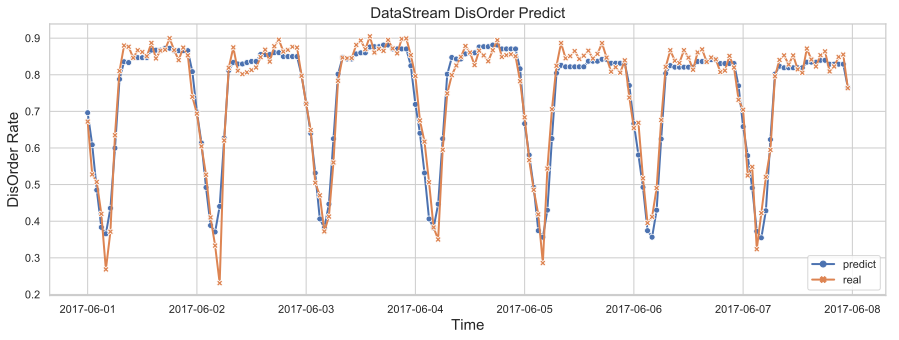

In [15]:
draw.draw_real_predict(
    week_num=1,
    start_time="2017-06-01 00:00:00",
    title="DataStream DisOrder Predict",
    figsize=(15,5)
)

## 回归性能指标

In [16]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [17]:
from didiMetric import get_xgb_metrics

In [18]:
months = [DIDI201705, DIDI201706, DIDI201707, DIDI201708, DIDI201709, DIDI201710]

In [19]:
update_metrics = get_xgb_metrics(months, True)
unupdate_metrics = get_xgb_metrics(months, False)
result = pd.concat([update_metrics,unupdate_metrics], axis=1)
result.columns = [["Update Model","Update Model","Update Model","UnUpdate Model","UnUpdate Model","UnUpdate Model"],["RMSE", "MAE", "R2S","RMSE", "MAE", "R2S"]]

100%|██████████| 1/1 [00:08<00:00,  8.14s/it]

[0]	validation_0-rmse:0.276789
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.251102
[2]	validation_0-rmse:0.227951
[3]	validation_0-rmse:0.207032
[4]	validation_0-rmse:0.188174
[5]	validation_0-rmse:0.171532
[6]	validation_0-rmse:0.156409
[7]	validation_0-rmse:0.142881
[8]	validation_0-rmse:0.130798
[9]	validation_0-rmse:0.120099
[10]	validation_0-rmse:0.110548
[11]	validation_0-rmse:0.101895
[12]	validation_0-rmse:0.094327
[13]	validation_0-rmse:0.087636
[14]	validation_0-rmse:0.081605
[15]	validation_0-rmse:0.076307
[16]	validation_0-rmse:0.071748
[17]	validation_0-rmse:0.067597
[18]	validation_0-rmse:0.063985
[19]	validation_0-rmse:0.060903
[20]	validation_0-rmse:0.058221
[21]	validation_0-rmse:0.05579
[22]	validation_0-rmse:0.053746
[23]	validation_0-rmse:0.052063
[24]	validation_0-rmse:0.050452
[25]	validation_0-rmse:0.049149
[26]	validation_0-rmse:0.047976
[27]	validation_0-rmse:0.046968
[28]	validation_0-rmse:0.046202
[29]	validation_0-

[58]	validation_0-rmse:0.041714
[59]	validation_0-rmse:0.041744
[60]	validation_0-rmse:0.041845
[61]	validation_0-rmse:0.041773
[62]	validation_0-rmse:0.041781
[63]	validation_0-rmse:0.041819
[64]	validation_0-rmse:0.041936
[65]	validation_0-rmse:0.041984
[66]	validation_0-rmse:0.041946
[67]	validation_0-rmse:0.0419
[68]	validation_0-rmse:0.041929
[69]	validation_0-rmse:0.042
[70]	validation_0-rmse:0.041921
[71]	validation_0-rmse:0.041891
[72]	validation_0-rmse:0.041934
[73]	validation_0-rmse:0.042032
[74]	validation_0-rmse:0.042014
[75]	validation_0-rmse:0.042094
[76]	validation_0-rmse:0.04206
[77]	validation_0-rmse:0.042061
[78]	validation_0-rmse:0.042109
[79]	validation_0-rmse:0.042148
[80]	validation_0-rmse:0.04219
[81]	validation_0-rmse:0.04218
[82]	validation_0-rmse:0.042202
[83]	validation_0-rmse:0.042257
[84]	validation_0-rmse:0.042237
[85]	validation_0-rmse:0.042282
[86]	validation_0-rmse:0.042258
[87]	validation_0-rmse:0.042313
[88]	validation_0-rmse:0.042343
[89]	validation_

100%|██████████| 1/1 [00:08<00:00,  8.90s/it]

[0]	validation_0-rmse:0.284914
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.25811
[2]	validation_0-rmse:0.234007
[3]	validation_0-rmse:0.212372
[4]	validation_0-rmse:0.193039
[5]	validation_0-rmse:0.175625
[6]	validation_0-rmse:0.159956
[7]	validation_0-rmse:0.145976
[8]	validation_0-rmse:0.133449
[9]	validation_0-rmse:0.122193
[10]	validation_0-rmse:0.112259
[11]	validation_0-rmse:0.103327
[12]	validation_0-rmse:0.095344
[13]	validation_0-rmse:0.088297
[14]	validation_0-rmse:0.082083
[15]	validation_0-rmse:0.076564
[16]	validation_0-rmse:0.071665
[17]	validation_0-rmse:0.067354
[18]	validation_0-rmse:0.063624
[19]	validation_0-rmse:0.060275
[20]	validation_0-rmse:0.057401
[21]	validation_0-rmse:0.054842
[22]	validation_0-rmse:0.052759
[23]	validation_0-rmse:0.050877
[24]	validation_0-rmse:0.049369
[25]	validation_0-rmse:0.047877
[26]	validation_0-rmse:0.046728
[27]	validation_0-rmse:0.045694
[28]	validation_0-rmse:0.044743
[29]	validation_0-

[49]	validation_0-rmse:0.038861
[50]	validation_0-rmse:0.038867
[51]	validation_0-rmse:0.038812
[52]	validation_0-rmse:0.038757
[53]	validation_0-rmse:0.038743
[54]	validation_0-rmse:0.038734
[55]	validation_0-rmse:0.038695
[56]	validation_0-rmse:0.038645
[57]	validation_0-rmse:0.038663
[58]	validation_0-rmse:0.03864
[59]	validation_0-rmse:0.038665
[60]	validation_0-rmse:0.038638
[61]	validation_0-rmse:0.038618
[62]	validation_0-rmse:0.038603
[63]	validation_0-rmse:0.038596
[64]	validation_0-rmse:0.03863
[65]	validation_0-rmse:0.03862
[66]	validation_0-rmse:0.038614
[67]	validation_0-rmse:0.038613
[68]	validation_0-rmse:0.038636
[69]	validation_0-rmse:0.038613
[70]	validation_0-rmse:0.038662
[71]	validation_0-rmse:0.038725
[72]	validation_0-rmse:0.038749
[73]	validation_0-rmse:0.038769
[74]	validation_0-rmse:0.038821
[75]	validation_0-rmse:0.038753
[76]	validation_0-rmse:0.038739
[77]	validation_0-rmse:0.038762
[78]	validation_0-rmse:0.038815
[79]	validation_0-rmse:0.038839
[80]	valida

100%|██████████| 1/1 [00:06<00:00,  6.95s/it]

[0]	validation_0-rmse:0.288597
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.261091
[2]	validation_0-rmse:0.23618
[3]	validation_0-rmse:0.213991
[4]	validation_0-rmse:0.193875
[5]	validation_0-rmse:0.17583
[6]	validation_0-rmse:0.15964
[7]	validation_0-rmse:0.145148
[8]	validation_0-rmse:0.132167
[9]	validation_0-rmse:0.120736
[10]	validation_0-rmse:0.110424
[11]	validation_0-rmse:0.101173
[12]	validation_0-rmse:0.093026
[13]	validation_0-rmse:0.085839
[14]	validation_0-rmse:0.079567
[15]	validation_0-rmse:0.073864
[16]	validation_0-rmse:0.068932
[17]	validation_0-rmse:0.064679
[18]	validation_0-rmse:0.060889
[19]	validation_0-rmse:0.057625
[20]	validation_0-rmse:0.054701
[21]	validation_0-rmse:0.052364
[22]	validation_0-rmse:0.050151
[23]	validation_0-rmse:0.048323
[24]	validation_0-rmse:0.046843
[25]	validation_0-rmse:0.045428
[26]	validation_0-rmse:0.044398
[27]	validation_0-rmse:0.043496
[28]	validation_0-rmse:0.04279
[29]	validation_0-rms

[56]	validation_0-rmse:0.037909
[57]	validation_0-rmse:0.03788
[58]	validation_0-rmse:0.037926
[59]	validation_0-rmse:0.037936
[60]	validation_0-rmse:0.037896
[61]	validation_0-rmse:0.037988
[62]	validation_0-rmse:0.037929
[63]	validation_0-rmse:0.037893
[64]	validation_0-rmse:0.037834
[65]	validation_0-rmse:0.037827
[66]	validation_0-rmse:0.037804
[67]	validation_0-rmse:0.037885
[68]	validation_0-rmse:0.037821
[69]	validation_0-rmse:0.037893
[70]	validation_0-rmse:0.037909
[71]	validation_0-rmse:0.03789
[72]	validation_0-rmse:0.037975
[73]	validation_0-rmse:0.037968
[74]	validation_0-rmse:0.037927
[75]	validation_0-rmse:0.038002
[76]	validation_0-rmse:0.037963
[77]	validation_0-rmse:0.037968
[78]	validation_0-rmse:0.037976
[79]	validation_0-rmse:0.037964
[80]	validation_0-rmse:0.038031
[81]	validation_0-rmse:0.038011
[82]	validation_0-rmse:0.037918
[83]	validation_0-rmse:0.037974
[84]	validation_0-rmse:0.038004
[85]	validation_0-rmse:0.038002
[86]	validation_0-rmse:0.038036
[87]	valid

100%|██████████| 1/1 [00:05<00:00,  5.30s/it]

[0]	validation_0-rmse:0.288511
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.26057
[2]	validation_0-rmse:0.235474
[3]	validation_0-rmse:0.212963
[4]	validation_0-rmse:0.192805
[5]	validation_0-rmse:0.174748
[6]	validation_0-rmse:0.158722
[7]	validation_0-rmse:0.144296
[8]	validation_0-rmse:0.131452
[9]	validation_0-rmse:0.120019
[10]	validation_0-rmse:0.109902
[11]	validation_0-rmse:0.100817
[12]	validation_0-rmse:0.093019
[13]	validation_0-rmse:0.085968
[14]	validation_0-rmse:0.079927
[15]	validation_0-rmse:0.074726
[16]	validation_0-rmse:0.06996
[17]	validation_0-rmse:0.066003
[18]	validation_0-rmse:0.062593
[19]	validation_0-rmse:0.059564
[20]	validation_0-rmse:0.057231
[21]	validation_0-rmse:0.055027
[22]	validation_0-rmse:0.053294
[23]	validation_0-rmse:0.051791
[24]	validation_0-rmse:0.050491
[25]	validation_0-rmse:0.049392
[26]	validation_0-rmse:0.048592
[27]	validation_0-rmse:0.047969
[28]	validation_0-rmse:0.047396
[29]	validation_0-r

[63]	validation_0-rmse:0.043314
[64]	validation_0-rmse:0.043308
[65]	validation_0-rmse:0.0433
[66]	validation_0-rmse:0.043245
[67]	validation_0-rmse:0.043196
[68]	validation_0-rmse:0.043165
[69]	validation_0-rmse:0.043156
[70]	validation_0-rmse:0.043103
[71]	validation_0-rmse:0.043081
[72]	validation_0-rmse:0.043082
[73]	validation_0-rmse:0.04304
[74]	validation_0-rmse:0.043034
[75]	validation_0-rmse:0.042998
[76]	validation_0-rmse:0.043007
[77]	validation_0-rmse:0.042971
[78]	validation_0-rmse:0.042988
[79]	validation_0-rmse:0.042952
[80]	validation_0-rmse:0.042984
[81]	validation_0-rmse:0.043003
[82]	validation_0-rmse:0.042991
[83]	validation_0-rmse:0.042978
[84]	validation_0-rmse:0.042974
[85]	validation_0-rmse:0.042962
[86]	validation_0-rmse:0.04292
[87]	validation_0-rmse:0.042885
[88]	validation_0-rmse:0.042858
[89]	validation_0-rmse:0.042881
[90]	validation_0-rmse:0.042858
[91]	validation_0-rmse:0.042868
[92]	validation_0-rmse:0.042816
[93]	validation_0-rmse:0.042835
[94]	validat

100%|██████████| 1/1 [00:06<00:00,  6.96s/it]

[0]	validation_0-rmse:0.29136
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.263833
[2]	validation_0-rmse:0.238867
[3]	validation_0-rmse:0.216594
[4]	validation_0-rmse:0.196648
[5]	validation_0-rmse:0.178783
[6]	validation_0-rmse:0.162799
[7]	validation_0-rmse:0.148596
[8]	validation_0-rmse:0.135896
[9]	validation_0-rmse:0.124616
[10]	validation_0-rmse:0.11463
[11]	validation_0-rmse:0.105713
[12]	validation_0-rmse:0.097928
[13]	validation_0-rmse:0.091077
[14]	validation_0-rmse:0.084888
[15]	validation_0-rmse:0.079471
[16]	validation_0-rmse:0.07486
[17]	validation_0-rmse:0.070911
[18]	validation_0-rmse:0.06748
[19]	validation_0-rmse:0.064452
[20]	validation_0-rmse:0.061956
[21]	validation_0-rmse:0.059872
[22]	validation_0-rmse:0.058048
[23]	validation_0-rmse:0.05653
[24]	validation_0-rmse:0.055165
[25]	validation_0-rmse:0.053988
[26]	validation_0-rmse:0.053024
[27]	validation_0-rmse:0.052244
[28]	validation_0-rmse:0.051628
[29]	validation_0-rmse

[49]	validation_0-rmse:0.048318
[50]	validation_0-rmse:0.048223
[51]	validation_0-rmse:0.048183
[52]	validation_0-rmse:0.048188
[53]	validation_0-rmse:0.048179
[54]	validation_0-rmse:0.048186
[55]	validation_0-rmse:0.048146
[56]	validation_0-rmse:0.048146
[57]	validation_0-rmse:0.048123
[58]	validation_0-rmse:0.048111
[59]	validation_0-rmse:0.048108
[60]	validation_0-rmse:0.048076
[61]	validation_0-rmse:0.048098
[62]	validation_0-rmse:0.048119
[63]	validation_0-rmse:0.048045
[64]	validation_0-rmse:0.048011
[65]	validation_0-rmse:0.048008
[66]	validation_0-rmse:0.048063
[67]	validation_0-rmse:0.048095
[68]	validation_0-rmse:0.048091
[69]	validation_0-rmse:0.048102
[70]	validation_0-rmse:0.048117
[71]	validation_0-rmse:0.048139
[72]	validation_0-rmse:0.048166
[73]	validation_0-rmse:0.048191
[74]	validation_0-rmse:0.048192
[75]	validation_0-rmse:0.048183
[76]	validation_0-rmse:0.048199
[77]	validation_0-rmse:0.048216
[78]	validation_0-rmse:0.048175
[79]	validation_0-rmse:0.048156
[80]	val

100%|██████████| 1/1 [00:05<00:00,  5.28s/it]

[0]	validation_0-rmse:0.276789
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.251102
[2]	validation_0-rmse:0.227951
[3]	validation_0-rmse:0.207032
[4]	validation_0-rmse:0.188174
[5]	validation_0-rmse:0.171532
[6]	validation_0-rmse:0.156409
[7]	validation_0-rmse:0.142881
[8]	validation_0-rmse:0.130798
[9]	validation_0-rmse:0.120099
[10]	validation_0-rmse:0.110548
[11]	validation_0-rmse:0.101895
[12]	validation_0-rmse:0.094327
[13]	validation_0-rmse:0.087636
[14]	validation_0-rmse:0.081605
[15]	validation_0-rmse:0.076307
[16]	validation_0-rmse:0.071748
[17]	validation_0-rmse:0.067597
[18]	validation_0-rmse:0.063985
[19]	validation_0-rmse:0.060903
[20]	validation_0-rmse:0.058221
[21]	validation_0-rmse:0.05579
[22]	validation_0-rmse:0.053746
[23]	validation_0-rmse:0.052063
[24]	validation_0-rmse:0.050452
[25]	validation_0-rmse:0.049149
[26]	validation_0-rmse:0.047976
[27]	validation_0-rmse:0.046968
[28]	validation_0-rmse:0.046202
[29]	validation_0-

[68]	validation_0-rmse:0.041929
[69]	validation_0-rmse:0.042
[70]	validation_0-rmse:0.041921
[71]	validation_0-rmse:0.041891
[72]	validation_0-rmse:0.041934
[73]	validation_0-rmse:0.042032
[74]	validation_0-rmse:0.042014
[75]	validation_0-rmse:0.042094
[76]	validation_0-rmse:0.04206
[77]	validation_0-rmse:0.042061
[78]	validation_0-rmse:0.042109
[79]	validation_0-rmse:0.042148
[80]	validation_0-rmse:0.04219
[81]	validation_0-rmse:0.04218
[82]	validation_0-rmse:0.042202
[83]	validation_0-rmse:0.042257
[84]	validation_0-rmse:0.042237
[85]	validation_0-rmse:0.042282
[86]	validation_0-rmse:0.042258
[87]	validation_0-rmse:0.042313
[88]	validation_0-rmse:0.042343
[89]	validation_0-rmse:0.042333
[90]	validation_0-rmse:0.04229
[91]	validation_0-rmse:0.042271
[92]	validation_0-rmse:0.042223
[93]	validation_0-rmse:0.042154
[94]	validation_0-rmse:0.042206
[95]	validation_0-rmse:0.042207
[96]	validation_0-rmse:0.042202
[97]	validation_0-rmse:0.042216
[98]	validation_0-rmse:0.042221
[99]	validation

100%|██████████| 1/1 [00:05<00:00,  5.41s/it]

[0]	validation_0-rmse:0.285731
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.259853
[2]	validation_0-rmse:0.236613
[3]	validation_0-rmse:0.215555
[4]	validation_0-rmse:0.196662
[5]	validation_0-rmse:0.179852
[6]	validation_0-rmse:0.164675
[7]	validation_0-rmse:0.151094
[8]	validation_0-rmse:0.138886
[9]	validation_0-rmse:0.128083
[10]	validation_0-rmse:0.118394
[11]	validation_0-rmse:0.10978
[12]	validation_0-rmse:0.102099
[13]	validation_0-rmse:0.095249
[14]	validation_0-rmse:0.089154
[15]	validation_0-rmse:0.083846
[16]	validation_0-rmse:0.079194
[17]	validation_0-rmse:0.074932
[18]	validation_0-rmse:0.071248
[19]	validation_0-rmse:0.068008
[20]	validation_0-rmse:0.065164
[21]	validation_0-rmse:0.062641
[22]	validation_0-rmse:0.060443
[23]	validation_0-rmse:0.058477
[24]	validation_0-rmse:0.056703
[25]	validation_0-rmse:0.055309
[26]	validation_0-rmse:0.054146
[27]	validation_0-rmse:0.05303
[28]	validation_0-rmse:0.051945
[29]	validation_0-r

[60]	validation_0-rmse:0.045161
[61]	validation_0-rmse:0.045086
[62]	validation_0-rmse:0.045107
[63]	validation_0-rmse:0.045046
[64]	validation_0-rmse:0.045015
[65]	validation_0-rmse:0.045008
[66]	validation_0-rmse:0.045001
[67]	validation_0-rmse:0.044998
[68]	validation_0-rmse:0.045078
[69]	validation_0-rmse:0.045111
[70]	validation_0-rmse:0.045069
[71]	validation_0-rmse:0.045065
[72]	validation_0-rmse:0.045155
[73]	validation_0-rmse:0.045176
[74]	validation_0-rmse:0.045179
[75]	validation_0-rmse:0.045269
[76]	validation_0-rmse:0.045235
[77]	validation_0-rmse:0.045266
[78]	validation_0-rmse:0.045356
[79]	validation_0-rmse:0.045392
[80]	validation_0-rmse:0.045438
[81]	validation_0-rmse:0.045438
[82]	validation_0-rmse:0.045481
[83]	validation_0-rmse:0.045609
[84]	validation_0-rmse:0.045583
[85]	validation_0-rmse:0.045567
[86]	validation_0-rmse:0.045537
[87]	validation_0-rmse:0.045555
[88]	validation_0-rmse:0.045537
[89]	validation_0-rmse:0.045546
[90]	validation_0-rmse:0.045572
[91]	val

100%|██████████| 1/1 [00:05<00:00,  5.75s/it]

[0]	validation_0-rmse:0.290627
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.264963
[2]	validation_0-rmse:0.241932
[3]	validation_0-rmse:0.221037
[4]	validation_0-rmse:0.202295
[5]	validation_0-rmse:0.185673
[6]	validation_0-rmse:0.17052
[7]	validation_0-rmse:0.157056
[8]	validation_0-rmse:0.144968
[9]	validation_0-rmse:0.134232
[10]	validation_0-rmse:0.1246
[11]	validation_0-rmse:0.115996
[12]	validation_0-rmse:0.108292
[13]	validation_0-rmse:0.101556
[14]	validation_0-rmse:0.095457
[15]	validation_0-rmse:0.090172
[16]	validation_0-rmse:0.085456
[17]	validation_0-rmse:0.081162
[18]	validation_0-rmse:0.077495
[19]	validation_0-rmse:0.074168
[20]	validation_0-rmse:0.071248
[21]	validation_0-rmse:0.068685
[22]	validation_0-rmse:0.066466
[23]	validation_0-rmse:0.064499
[24]	validation_0-rmse:0.062766
[25]	validation_0-rmse:0.061319
[26]	validation_0-rmse:0.060055
[27]	validation_0-rmse:0.059038
[28]	validation_0-rmse:0.058075
[29]	validation_0-rm

[59]	validation_0-rmse:0.051731
[60]	validation_0-rmse:0.051784
[61]	validation_0-rmse:0.051736
[62]	validation_0-rmse:0.051755
[63]	validation_0-rmse:0.051763
[64]	validation_0-rmse:0.05179
[65]	validation_0-rmse:0.051802
[66]	validation_0-rmse:0.051804
[67]	validation_0-rmse:0.051879
[68]	validation_0-rmse:0.051917
[69]	validation_0-rmse:0.051939
[70]	validation_0-rmse:0.051923
[71]	validation_0-rmse:0.05194
[72]	validation_0-rmse:0.051989
[73]	validation_0-rmse:0.052066
[74]	validation_0-rmse:0.052064
[75]	validation_0-rmse:0.052111
[76]	validation_0-rmse:0.052101
[77]	validation_0-rmse:0.052119
[78]	validation_0-rmse:0.052175
[79]	validation_0-rmse:0.052226
[80]	validation_0-rmse:0.052279
[81]	validation_0-rmse:0.052282
[82]	validation_0-rmse:0.052298
[83]	validation_0-rmse:0.052382
[84]	validation_0-rmse:0.052408
[85]	validation_0-rmse:0.052436
[86]	validation_0-rmse:0.052492
[87]	validation_0-rmse:0.052502
[88]	validation_0-rmse:0.052527
[89]	validation_0-rmse:0.052558
[90]	valid

100%|██████████| 1/1 [00:06<00:00,  6.66s/it]

[0]	validation_0-rmse:0.290815
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.265156
[2]	validation_0-rmse:0.242054
[3]	validation_0-rmse:0.221181
[4]	validation_0-rmse:0.202397
[5]	validation_0-rmse:0.185826
[6]	validation_0-rmse:0.170861
[7]	validation_0-rmse:0.157373
[8]	validation_0-rmse:0.145361
[9]	validation_0-rmse:0.134824
[10]	validation_0-rmse:0.125263
[11]	validation_0-rmse:0.116771
[12]	validation_0-rmse:0.109249
[13]	validation_0-rmse:0.102607
[14]	validation_0-rmse:0.096621
[15]	validation_0-rmse:0.091435
[16]	validation_0-rmse:0.086766
[17]	validation_0-rmse:0.082675
[18]	validation_0-rmse:0.079019
[19]	validation_0-rmse:0.075846
[20]	validation_0-rmse:0.073121
[21]	validation_0-rmse:0.07067
[22]	validation_0-rmse:0.068529
[23]	validation_0-rmse:0.066648
[24]	validation_0-rmse:0.064924
[25]	validation_0-rmse:0.063479
[26]	validation_0-rmse:0.062195
[27]	validation_0-rmse:0.061152
[28]	validation_0-rmse:0.060061
[29]	validation_0-

[90]	validation_0-rmse:0.052457
[91]	validation_0-rmse:0.052396
[92]	validation_0-rmse:0.052416
[93]	validation_0-rmse:0.052357
[94]	validation_0-rmse:0.052412
[95]	validation_0-rmse:0.052401
[96]	validation_0-rmse:0.052371
[97]	validation_0-rmse:0.052377
[98]	validation_0-rmse:0.052367
[99]	validation_0-rmse:0.052426
[100]	validation_0-rmse:0.052404
[101]	validation_0-rmse:0.052458
[102]	validation_0-rmse:0.052437
[103]	validation_0-rmse:0.052405
[104]	validation_0-rmse:0.052393
[105]	validation_0-rmse:0.052384
[106]	validation_0-rmse:0.052434
[107]	validation_0-rmse:0.052429
[108]	validation_0-rmse:0.052424
[109]	validation_0-rmse:0.052413
[110]	validation_0-rmse:0.052442
[111]	validation_0-rmse:0.052457
[112]	validation_0-rmse:0.052442
[113]	validation_0-rmse:0.052411
[114]	validation_0-rmse:0.052376
[115]	validation_0-rmse:0.052367
[116]	validation_0-rmse:0.052374
[117]	validation_0-rmse:0.052376
[118]	validation_0-rmse:0.052333
[119]	validation_0-rmse:0.052324
[120]	validation_0-r

100%|██████████| 1/1 [00:06<00:00,  6.39s/it]

[0]	validation_0-rmse:0.293788
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.268334
[2]	validation_0-rmse:0.245546
[3]	validation_0-rmse:0.224954
[4]	validation_0-rmse:0.206536
[5]	validation_0-rmse:0.190228
[6]	validation_0-rmse:0.175538
[7]	validation_0-rmse:0.162454
[8]	validation_0-rmse:0.150766
[9]	validation_0-rmse:0.1405
[10]	validation_0-rmse:0.131345
[11]	validation_0-rmse:0.123272
[12]	validation_0-rmse:0.116133
[13]	validation_0-rmse:0.109805
[14]	validation_0-rmse:0.104202
[15]	validation_0-rmse:0.099385
[16]	validation_0-rmse:0.095171
[17]	validation_0-rmse:0.091423
[18]	validation_0-rmse:0.088168
[19]	validation_0-rmse:0.085314
[20]	validation_0-rmse:0.082843
[21]	validation_0-rmse:0.080663
[22]	validation_0-rmse:0.078775
[23]	validation_0-rmse:0.077077
[24]	validation_0-rmse:0.075576
[25]	validation_0-rmse:0.074399
[26]	validation_0-rmse:0.073309
[27]	validation_0-rmse:0.072393
[28]	validation_0-rmse:0.071506
[29]	validation_0-r

[52]	validation_0-rmse:0.065553
[53]	validation_0-rmse:0.065462
[54]	validation_0-rmse:0.065471
[55]	validation_0-rmse:0.065459
[56]	validation_0-rmse:0.065532
[57]	validation_0-rmse:0.065478
[58]	validation_0-rmse:0.065466
[59]	validation_0-rmse:0.065484
[60]	validation_0-rmse:0.065504
[61]	validation_0-rmse:0.065451
[62]	validation_0-rmse:0.065441
[63]	validation_0-rmse:0.065445
[64]	validation_0-rmse:0.065446
[65]	validation_0-rmse:0.065427
[66]	validation_0-rmse:0.065446
[67]	validation_0-rmse:0.065391
[68]	validation_0-rmse:0.065454
[69]	validation_0-rmse:0.065429
[70]	validation_0-rmse:0.065367
[71]	validation_0-rmse:0.065368
[72]	validation_0-rmse:0.065434
[73]	validation_0-rmse:0.06551
[74]	validation_0-rmse:0.065511
[75]	validation_0-rmse:0.065603
[76]	validation_0-rmse:0.065581
[77]	validation_0-rmse:0.065592
[78]	validation_0-rmse:0.065661
[79]	validation_0-rmse:0.065684
[80]	validation_0-rmse:0.065691
[81]	validation_0-rmse:0.065685
[82]	validation_0-rmse:0.065701
[83]	vali

In [20]:
result

Update Model                     UnUpdate Model                    
                   RMSE       MAE       R2S           RMSE       MAE       R2S
2018-09-01     0.041500  0.022499  0.934274       0.041500  0.022499  0.934274
2018-10-01     0.038596  0.022682  0.940950       0.044998  0.028651  0.919734
2018-11-01     0.037803  0.018452  0.943478       0.051672  0.035045  0.894398
2018-12-01     0.042673  0.022607  0.925134       0.052242  0.031584  0.887796
2019-01-01     0.048008  0.023855  0.893191       0.065367  0.035935  0.801986

In [21]:
update_metrics

,mse,mae,r2s
2018-09-01,0.041500,0.022499,0.934274
2018-10-01,0.038596,0.022682,0.940950
2018-11-01,0.037803,0.018452,0.943478
2018-12-01,0.042673,0.022607,0.925134
2019-01-01,0.048008,0.023855,0.893191


In [22]:
unupdate_metrics

,mse,mae,r2s
2018-09-01,0.041500,0.022499,0.934274
2018-10-01,0.044998,0.028651,0.919734
2018-11-01,0.051672,0.035045,0.894398
2018-12-01,0.052242,0.031584,0.887796
2019-01-01,0.065367,0.035935,0.801986
